In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy


# Common Functions

In [3]:
def plot_length(s, **kwargs):
    fig, ax = plt.subplots()
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        ax.barh(r, s[k], left=left_length, label=k)


def create_dirchlet_matrix(alpha: float,
                            size: int,
                            k: int):
    generator = np.random.default_rng()
    alpha = np.full(k, alpha)
    s = generator.dirichlet(alpha, size)
    return s


def plot_dirchlet_distr(frame):
    fig, axes = plt.subplots(2, 1)
    distribution = frame
    # PLOTS CLIENT'S TRAINING SET
    s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
    r = range(s.shape[1])
    for k in range(s.shape[0]):
        left_length = 0
        for previous in range(k):
            left_length += s[previous]
        axes[0].barh(r, s[k], left=left_length, label=k)
        axes[0].set_yticks([0,1,2,3,4,5,6,7,8,9])
        
    # # PLOTS CLIENT'S & ORCHESTRATOR'S TEST SET
    # s = distribution[distribution['partition'] == 'test_set'].drop(['client_id', 'partition', 'total_samples'], axis=1)
    # o = distribution[distribution['partition'] == 'central_test_set'].drop(['client_id', 'partition', 'total_samples'], axis=1)
    # s = pd.concat([s, o]).to_numpy().T
    # r = range(s.shape[1])
    # for k in range(s.shape[0]):
    #     left_length = 0
    #     for previous in range(k):
    #         left_length += s[previous]
    #     axes[1].barh(r, s[k], left=left_length, label=k)

# Model Selection

In [4]:
final_test_results = {
    task: pd.read_csv(os.path.join(os.getcwd(), task, 'model_selection', 'final_test_results.csv'))
    for task in ['mnist', 'fmnist', 'cifar10']
}

for task, frame in final_test_results.items():
    path = os.path.join(os.getcwd(), task, 'model_selection', 'final_test_results.tex')
    with open(path, 'w') as file:
        frame = frame.round(3)
        frame = frame.style.format(precision=3)
        file.write(frame.to_latex())

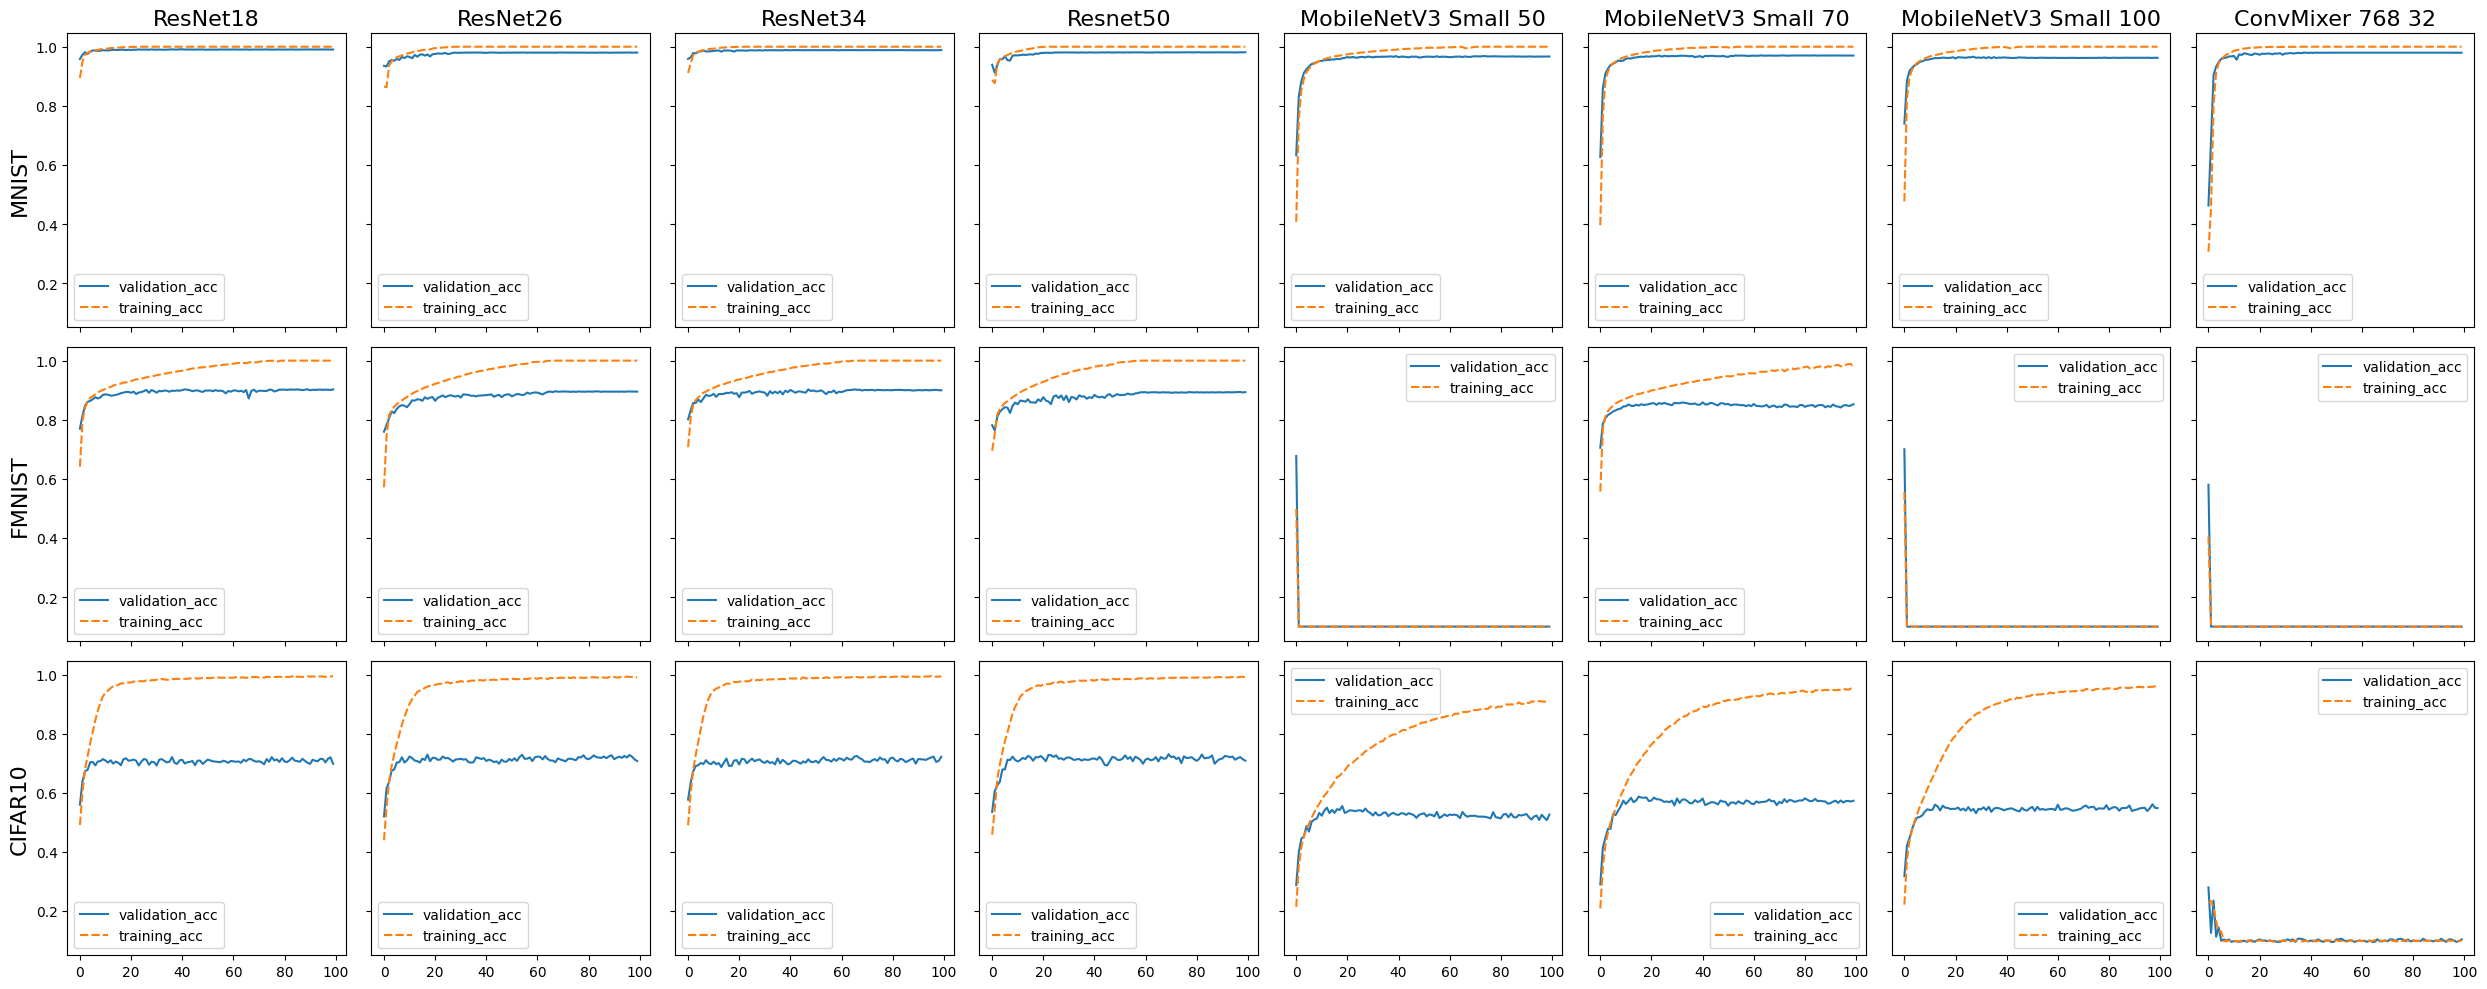

In [5]:
models = ['resnet18', 'resnet26', 'resnet34', 'resnet50', 'mobilenetv3_small_050', 'mobilenetv3_small_075', 'mobilenetv3_small_100', 'convmixer_768_32']
name_mapping = {
    'resnet18':'ResNet18',
    'resnet26':'ResNet26',
    'resnet34':'ResNet34',
    'resnet50':'Resnet50',
    'mobilenetv3_small_050':'MobileNetV3 Small 50',
    'mobilenetv3_small_075':'MobileNetV3 Small 70',
    'mobilenetv3_small_100':'MobileNetV3 Small 100',
    'convmixer_768_32':'ConvMixer 768 32'
}
TITLE_FONTSIZE = 16
Y_AXIS_FONTSIZE = 16

fig, axes = plt.subplots(3, 8, figsize=(25, 10), sharex=True, sharey=True)

for position in range(8):
    frame_mnist = pd.read_csv(os.path.join(os.getcwd(), 'mnist', 'model_selection', f"{models[position]}.csv"))
    frame_fmnist = pd.read_csv(os.path.join(os.getcwd(), 'fmnist', 'model_selection', f"{models[position]}.csv"))
    frame_cifar10 = pd.read_csv(os.path.join(os.getcwd(), 'cifar10', 'model_selection', f"{models[position]}.csv"))
    
    sns.lineplot(frame_mnist[['validation_acc', 'training_acc']], ax=axes[0][position])
    axes[0][position].set_title(name_mapping[models[position]], fontsize=TITLE_FONTSIZE)
    sns.lineplot(frame_fmnist[['validation_acc', 'training_acc']], ax=axes[1][position])
    sns.lineplot(frame_cifar10[['validation_acc', 'training_acc']], ax=axes[2][position])
    
    axes[0][0].set_ylabel('MNIST', fontsize=Y_AXIS_FONTSIZE)
    axes[1][0].set_ylabel('FMNIST', fontsize=Y_AXIS_FONTSIZE)
    axes[2][0].set_ylabel('CIFAR10', fontsize=Y_AXIS_FONTSIZE)

fig.tight_layout()

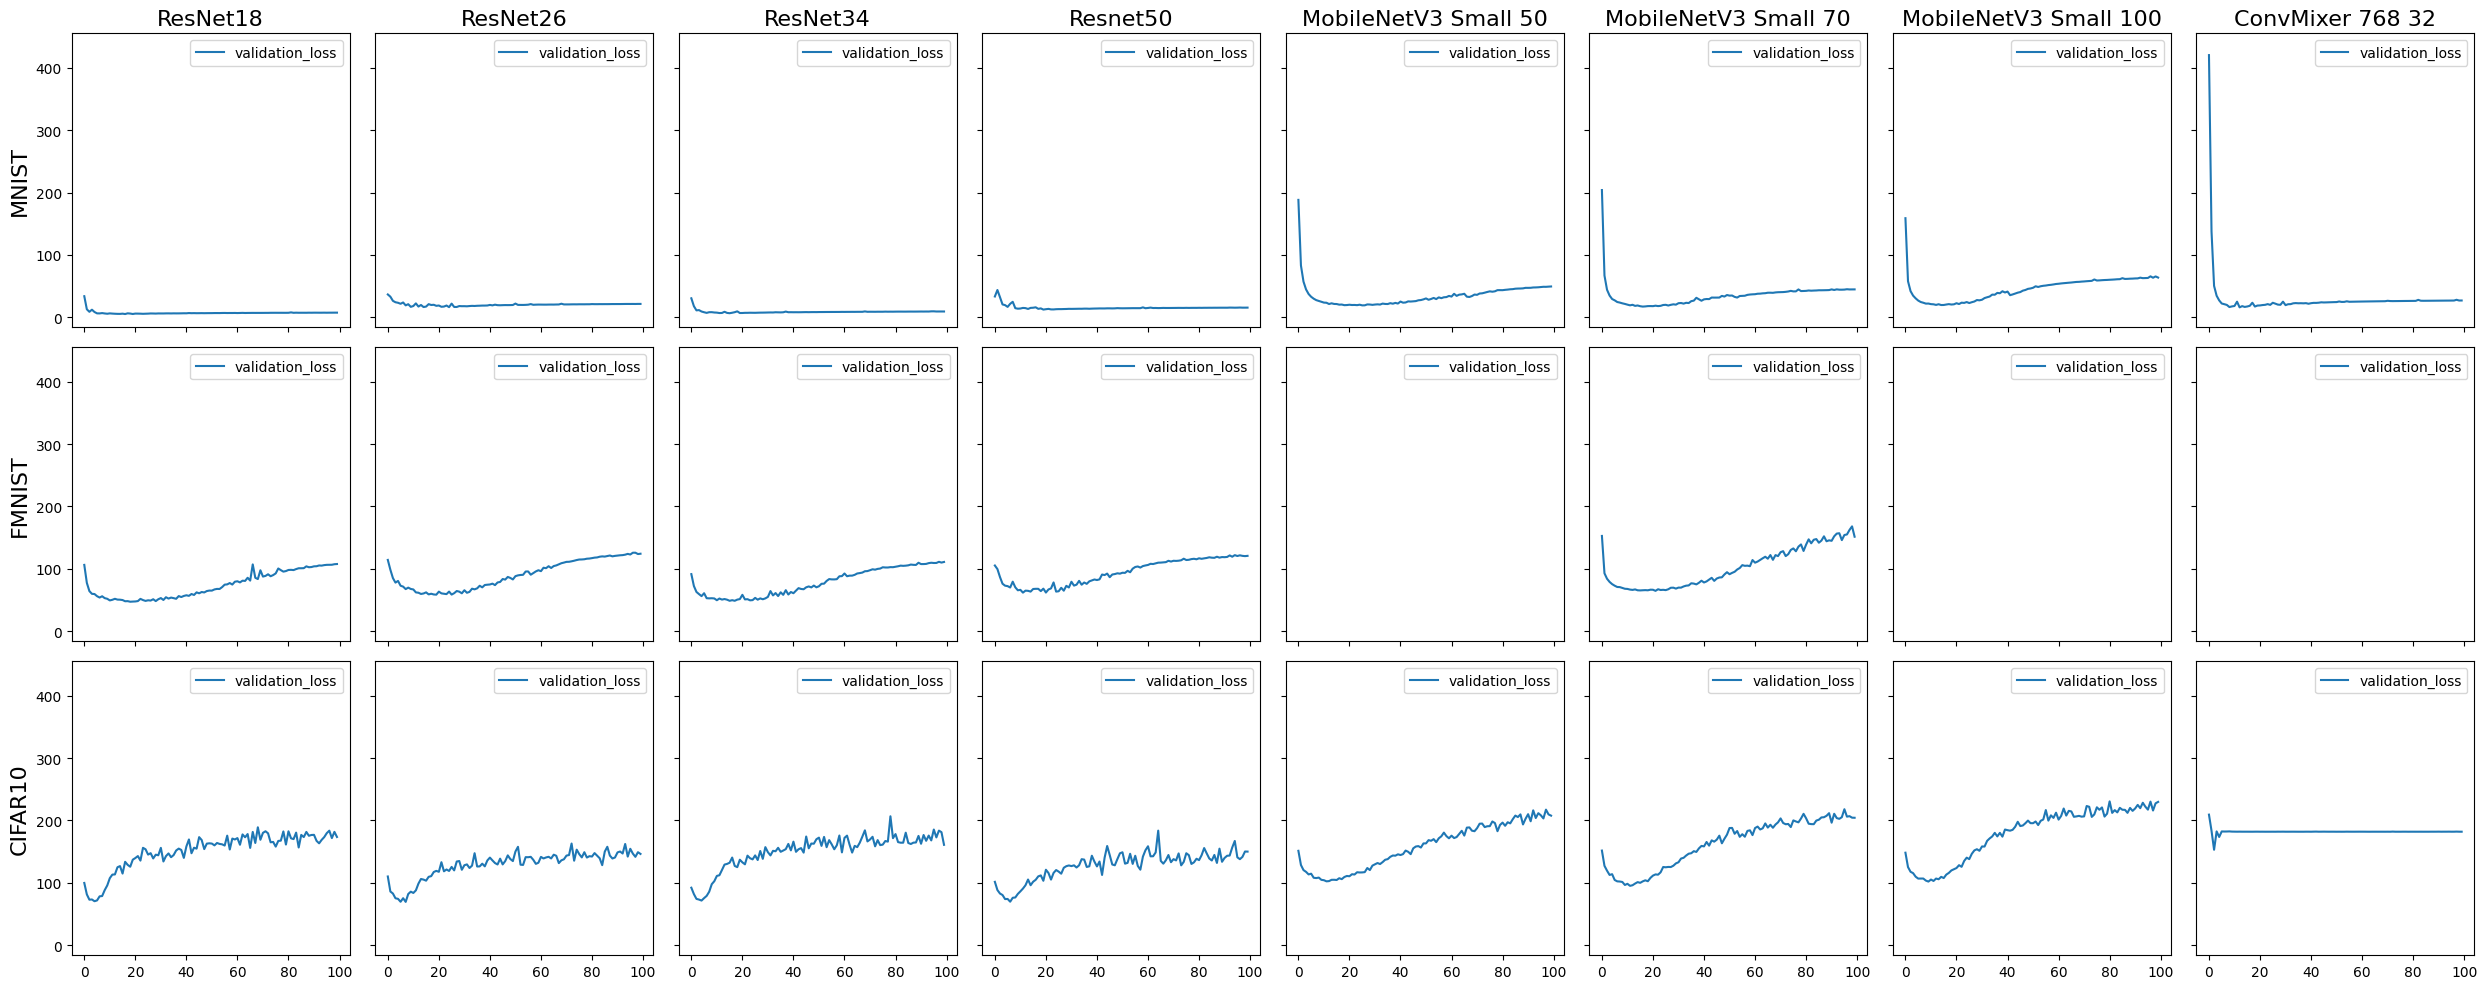

In [6]:
models = ['resnet18', 'resnet26', 'resnet34', 'resnet50', 'mobilenetv3_small_050', 'mobilenetv3_small_075', 'mobilenetv3_small_100', 'convmixer_768_32']
name_mapping = {
    'resnet18':'ResNet18',
    'resnet26':'ResNet26',
    'resnet34':'ResNet34',
    'resnet50':'Resnet50',
    'mobilenetv3_small_050':'MobileNetV3 Small 50',
    'mobilenetv3_small_075':'MobileNetV3 Small 70',
    'mobilenetv3_small_100':'MobileNetV3 Small 100',
    'convmixer_768_32':'ConvMixer 768 32'
}
TITLE_FONTSIZE = 16
Y_AXIS_FONTSIZE = 16

fig, axes = plt.subplots(3, 8, figsize=(25, 10), sharex=True, sharey=True)

for position in range(8):
    frame_mnist = pd.read_csv(os.path.join(os.getcwd(), 'mnist', 'model_selection', f"{models[position]}.csv"))
    frame_fmnist = pd.read_csv(os.path.join(os.getcwd(), 'fmnist', 'model_selection', f"{models[position]}.csv"))
    frame_cifar10 = pd.read_csv(os.path.join(os.getcwd(), 'cifar10', 'model_selection', f"{models[position]}.csv"))
    
    sns.lineplot(frame_mnist[['validation_loss']], ax=axes[0][position])
    axes[0][position].set_title(name_mapping[models[position]], fontsize=TITLE_FONTSIZE)
    sns.lineplot(frame_fmnist[['validation_loss']], ax=axes[1][position])
    sns.lineplot(frame_cifar10[['validation_loss']], ax=axes[2][position])
    
    axes[0][0].set_ylabel('MNIST', fontsize=Y_AXIS_FONTSIZE)
    axes[1][0].set_ylabel('FMNIST', fontsize=Y_AXIS_FONTSIZE)
    axes[2][0].set_ylabel('CIFAR10', fontsize=Y_AXIS_FONTSIZE)

fig.tight_layout()

# Federated Learning

## Datasets Example

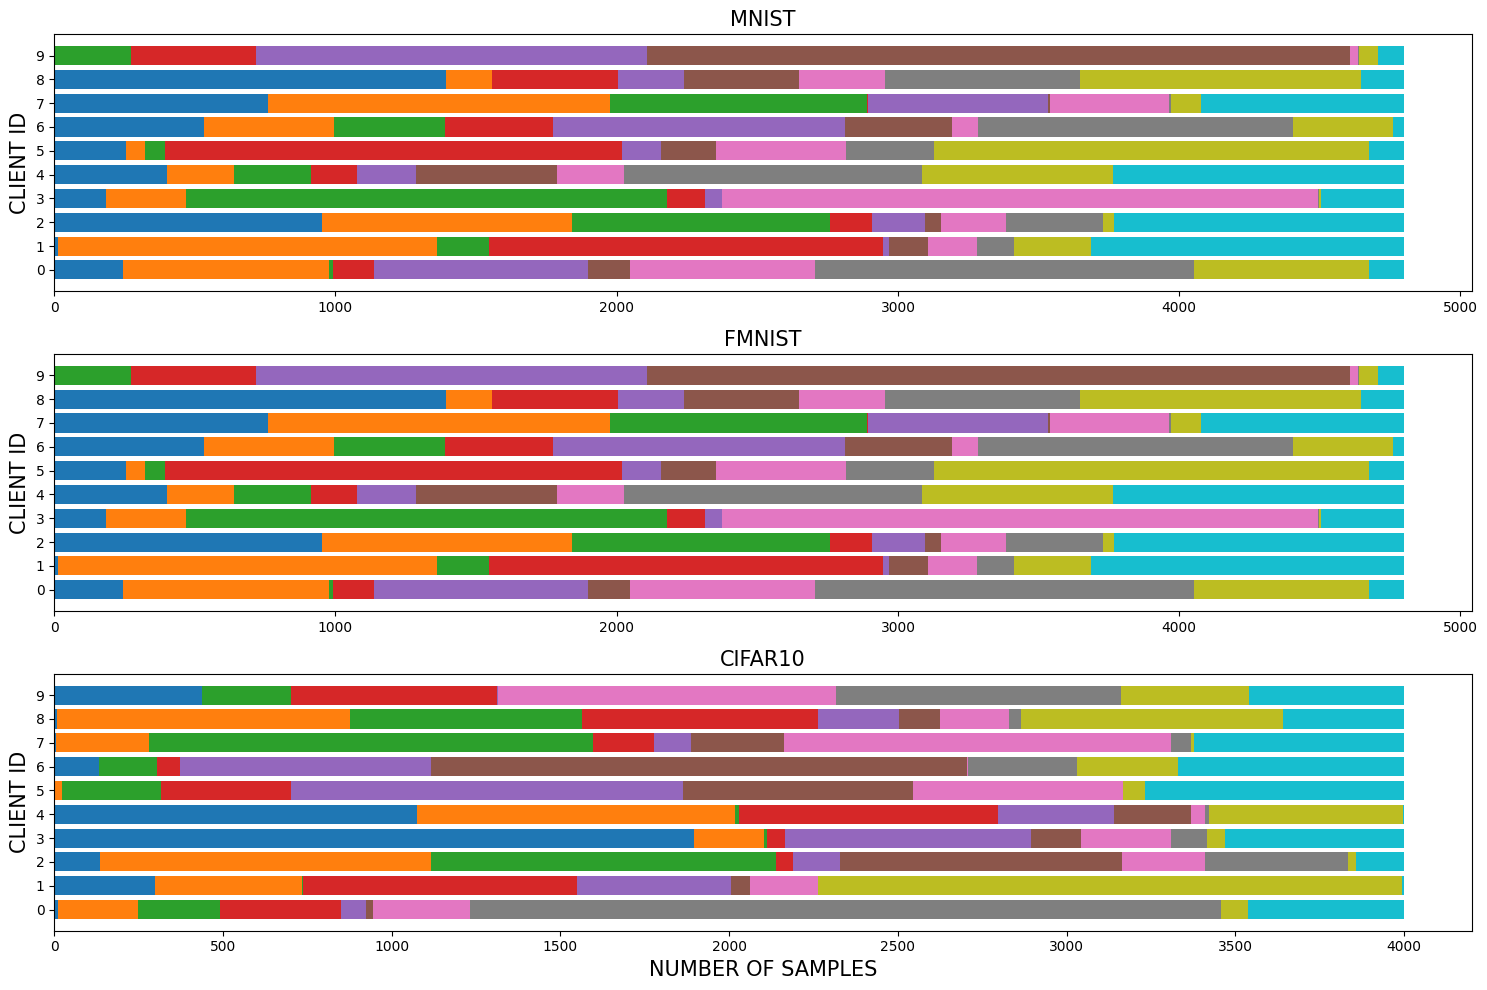

In [7]:
# LOADING FRAMES
agg_functions = {
'total_samples': 'sum',
'0':'sum',
'1':'sum',
'2':'sum',
'3':'sum',
'4':'sum',
'5':'sum',
'6':'sum',
'7':'sum',
'8':'sum',
'9':'sum'
}
mnist = pd.read_csv(os.path.join(os.getcwd(), 'mnist', 'federated', 'dataset', 'MNIST_10_dataset_blueprint.csv'))
fmnist = pd.read_csv(os.path.join(os.getcwd(), 'fmnist', 'federated', 'dataset', 'FMNIST_10_dataset_blueprint.csv'))
cifar10 = pd.read_csv(os.path.join(os.getcwd(), 'cifar10', 'federated', 'dataset', 'CIFAR10_10_dataset_blueprint.csv'))
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# MNIST
distribution = mnist
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[0].barh(r, s[k], left=left_length, label=k)
    axes[0].set_yticks([0,1,2,3,4,5,6,7,8,9])
    axes[0].set_title("MNIST", fontsize=15)
    axes[0].set_ylabel("CLIENT ID", fontsize=15)
    
# FMNIST
distribution = mnist
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[1].barh(r, s[k], left=left_length, label=k)
    axes[1].set_yticks([0,1,2,3,4,5,6,7,8,9])
    axes[1].set_title("FMNIST", fontsize=15)
    axes[1].set_ylabel("CLIENT ID", fontsize=15)

# CIFAR10
distribution = cifar10
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[2].barh(r, s[k], left=left_length, label=k)
    axes[2].set_yticks([0,1,2,3,4,5,6,7,8,9])
    axes[2].set_title("CIFAR10", fontsize=15)
    axes[2].set_xlabel("NUMBER OF SAMPLES", fontsize=15)
    axes[2].set_ylabel("CLIENT ID", fontsize=15)

fig.tight_layout()

## Results

### Orchestrator Performance (Generalization)

Text(0.5, 1.0, 'CIFAR10')

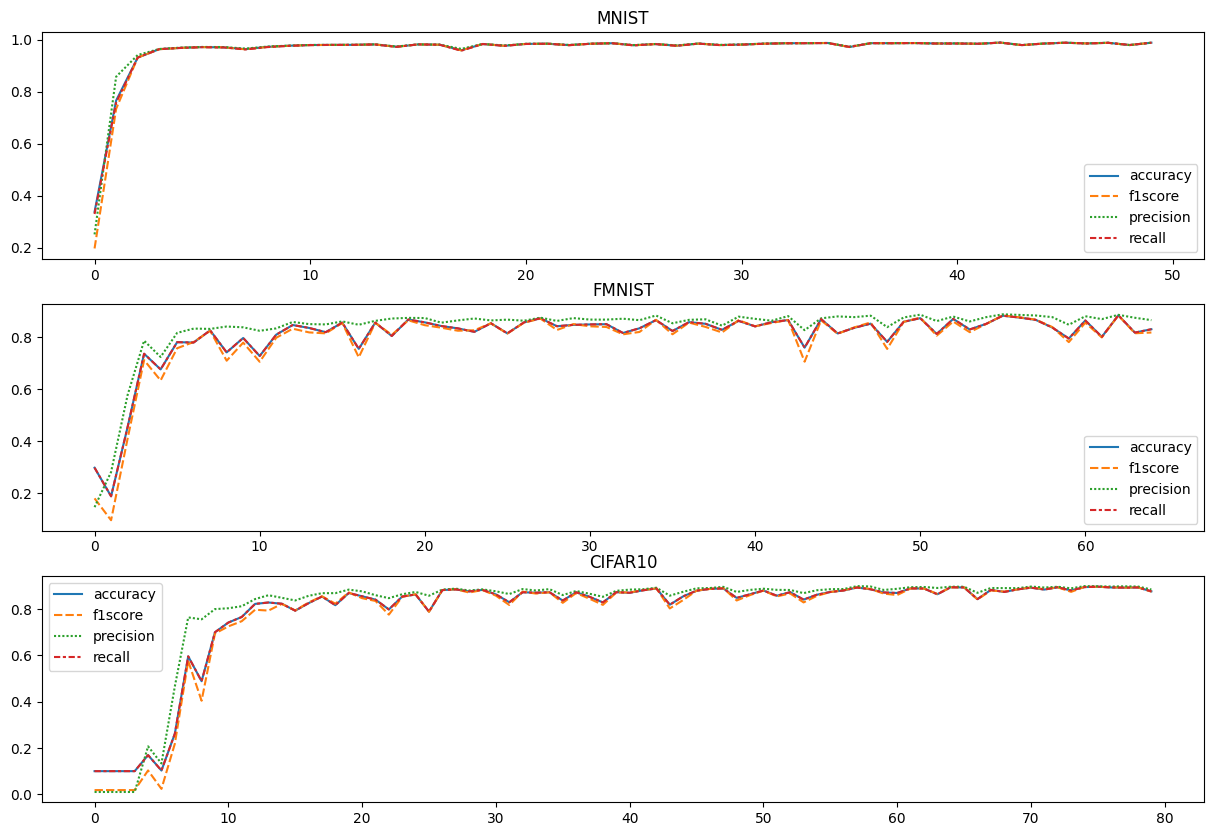

In [8]:
frame = [pd.read_csv(os.path.join(os.getcwd(), dataset, 'federated', f'{dataset}_fed', 'results', 'orchestrator_metrics.csv')) for dataset in ['mnist', 'fmnist', 'cifar10']]
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
sns.lineplot(frame[0][['accuracy', 'f1score', 'precision', 'recall']], ax=axes[0])
axes[0].set_title('MNIST')

sns.lineplot(frame[1][['accuracy', 'f1score', 'precision', 'recall']], ax=axes[1])
axes[1].set_title('FMNIST')

sns.lineplot(frame[2][['accuracy', 'f1score', 'precision', 'recall']], ax=axes[2])
axes[2].set_title('CIFAR10')

In [9]:
frame[0]['accuracy'].max()

0.9896

In [10]:
columns = ['accuracy', 'f1score', 'precision', 'recall']
best_result = pd.DataFrame(
    index=['MNIST', 'FMNIST', 'CIFAR10'], columns=columns
)
for f in frame:
    for metric in columns:
        best_result.loc['MNIST', metric] = frame[0][metric].max()
        best_result.loc['FMNIST', metric] = frame[1][metric].max()
        best_result.loc['CIFAR10', metric] = frame[2][metric].max()

In [39]:
path = os.path.join(os.getcwd(), 'best_results_orchestrator.tex')
with open(path, 'w') as file:
    frame = best_result.round(3)
    frame = frame.style.format(precision=3)
    file.write(frame.to_latex())

### Local Performance (Personalization)

Text(0.5, 1.0, 'CIFAR10')

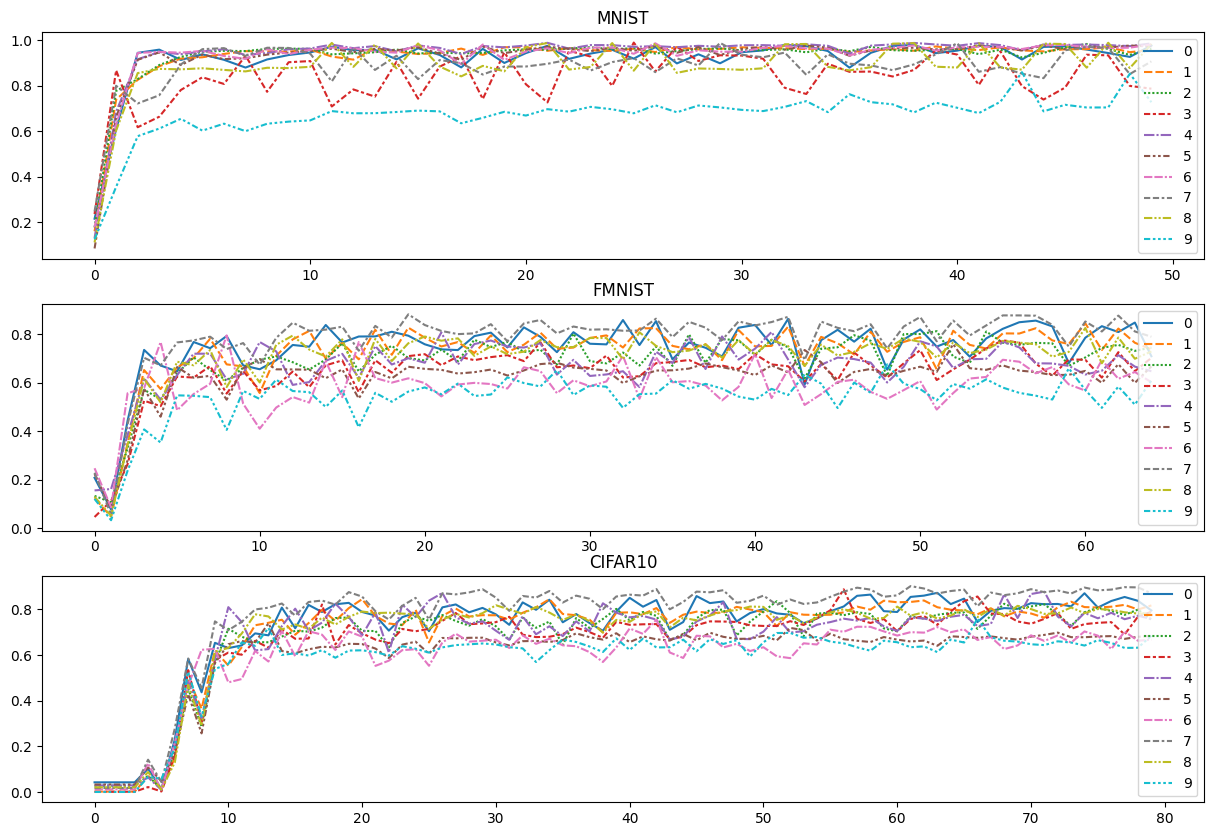

In [39]:
frame = [pd.read_csv(os.path.join(os.getcwd(), dataset, 'federated', f'{dataset}_fed', 'results', 'after_update_metrics.csv')) for dataset in ['mnist', 'fmnist', 'cifar10']]
frame[0][frame[0]['node_id'] == 0]['f1score']

f1score_per_node_mnist = pd.DataFrame(index=range(50), columns=range(10))
for node in range(10):
    f1score_per_node_mnist[node] = frame[0][frame[0]['node_id'] == node]['f1score'].reset_index()['f1score']

f1score_per_node_fmnist = pd.DataFrame(index=range(65), columns=range(10))
for node in range(10):
    f1score_per_node_fmnist[node] = frame[1][frame[1]['node_id'] == node]['f1score'].reset_index()['f1score']

f1score_per_node_cifar = pd.DataFrame(index=range(80), columns=range(10))
for node in range(10):
    f1score_per_node_cifar[node] = frame[2][frame[2]['node_id'] == node]['f1score'].reset_index()['f1score']

fig, axes = plt.subplots(3, 1, figsize=(15, 10))
sns.lineplot(f1score_per_node_mnist, ax=axes[0])
axes[0].set_title('MNIST')

sns.lineplot(f1score_per_node_fmnist, ax=axes[1])
axes[1].set_title('FMNIST')

sns.lineplot(f1score_per_node_cifar, ax=axes[2])
axes[2].set_title('CIFAR10')

In [50]:
frame = [pd.read_csv(os.path.join(os.getcwd(), dataset, 'federated', f'{dataset}_fed', 'results', 'after_update_metrics.csv')) for dataset in ['mnist', 'fmnist', 'cifar10']]
frame[0]

,test_loss,accuracy,f1score,precision,recall,accuracy_per_0,accuracy_per_1,accuracy_per_2,accuracy_per_3,accuracy_per_4,accuracy_per_5,accuracy_per_6,accuracy_per_7,accuracy_per_8,accuracy_per_9,node_id,epoch
0,2.358703,0.444167,0.215874,0.241866,0.337935,0.111111,0.972376,0.333333,0.000000,0.968586,0.000000,0.993939,0.000000,0.000000,0.000000,0,0
1,3.597836,0.322500,0.160759,0.204222,0.354579,0.142857,0.984326,0.418605,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1,0
2,2.294631,0.345833,0.177631,0.279762,0.327428,0.035556,0.991935,0.347280,0.000000,0.941176,0.000000,0.958333,0.000000,0.000000,0.000000,2,0
3,1.201015,0.605000,0.236497,0.243649,0.361923,0.000000,0.985294,0.296729,0.000000,1.000000,NaN,0.975285,0.000000,0.000000,0.000000,3,0
4,3.661176,0.165000,0.130876,0.194458,0.340393,0.032967,1.000000,0.403226,0.000000,0.967742,0.000000,1.000000,0.000000,0.000000,0.000000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.043153,0.985000,0.973338,0.959384,0.988698,1.000000,1.000000,1.000000,0.986667,1.000000,1.000000,1.000000,1.000000,0.975309,0.925000,5,49
496,0.023695,0.991667,0.982292,0.973829,0.993027,1.000000,0.990741,0.990476,0.979798,0.996047,1.000000,1.000000,0.985401,0.987805,1.000000,6,49
497,0.029101,0.990833,0.907758,0.874226,0.991369,0.995370,1.000000,0.982759,1.000000,0.986111,1.000000,1.000000,1.000000,0.967742,0.981707,7,49
498,0.037405,0.989167,0.984007,0.981036,0.987202,0.989011,0.980392,NaN,0.983607,0.983871,0.990741,1.000000,0.993789,0.991189,0.972222,8,49


In [54]:
acc_per_node_mnist = pd.DataFrame(index=range(50), columns=range(10))
f1score_per_node_mnist = pd.DataFrame(index=range(50), columns=range(10))
perc_per_node_mnist = pd.DataFrame(index=range(50), columns=range(10))
rec_per_node_mnist = pd.DataFrame(index=range(50), columns=range(10))
for node in range(10):
    acc_per_node_mnist = frame[0][frame[0]['node_id'] == node]['accuracy'].reset_index()['accuracy']
    f1score_per_node_mnist[node] = frame[0][frame[0]['node_id'] == node]['f1score'].reset_index()['f1score']
    perc_per_node_mnist[node] = frame[0][frame[0]['node_id'] == node]['precision'].reset_index()['precision']
    rec_per_node_mnist[node] = frame[0][frame[0]['node_id'] == node]['recall'].reset_index()['recall']

acc_per_node_fmnist = pd.DataFrame(index=range(50), columns=range(10))
f1score_per_node_fmnist = pd.DataFrame(index=range(50), columns=range(10))
perc_per_node_fmnist = pd.DataFrame(index=range(50), columns=range(10))
rec_per_node_fmnist = pd.DataFrame(index=range(50), columns=range(10))
for node in range(10):
    acc_per_node_fmnist = frame[0][frame[0]['node_id'] == node]['accuracy'].reset_index()['accuracy']
    f1score_per_node_fmnist[node] = frame[0][frame[0]['node_id'] == node]['f1score'].reset_index()['f1score']
    perc_per_node_fmnist[node] = frame[0][frame[0]['node_id'] == node]['precision'].reset_index()['precision']
    rec_per_node_fmnist[node] = frame[0][frame[0]['node_id'] == node]['recall'].reset_index()['recall']

acc_per_node_cifar = pd.DataFrame(index=range(50), columns=range(10))
f1score_per_node_cifar = pd.DataFrame(index=range(50), columns=range(10))
perc_per_node_cifar = pd.DataFrame(index=range(50), columns=range(10))
rec_per_node_cifar = pd.DataFrame(index=range(50), columns=range(10))
for node in range(10):
    acc_per_node_cifar = frame[0][frame[0]['node_id'] == node]['accuracy'].reset_index()['accuracy']
    f1score_per_node_cifar[node] = frame[0][frame[0]['node_id'] == node]['f1score'].reset_index()['f1score']
    perc_per_node_cifar[node] = frame[0][frame[0]['node_id'] == node]['precision'].reset_index()['precision']
    rec_per_node_cifar[node] = frame[0][frame[0]['node_id'] == node]['recall'].reset_index()['recall']

In [55]:
personalized_scores = pd.DataFrame(index=range(10), columns=['MNIST ACC', 'MNIST F1SCORE', 'MNIST PREC', 'MNIST REC',
                                                             'FMNIST ACC', 'FMNIST F1SCORE', 'FMNIST PREC', 'FMNIST REC',
                                                             'CIFAR10 ACC', 'CIFAR10 F1SCORE', 'CIFAR10 PREC', 'CIFAR10 REC'])
personalized_scores['MNIST ACC'] = acc_per_node_mnist.max()
personalized_scores['MNIST F1SCORE'] = f1score_per_node_mnist.max()
personalized_scores['MNIST PREC'] = perc_per_node_mnist.max()
personalized_scores['MNIST REC'] = perc_per_node_mnist.max()

personalized_scores['FMNIST ACC'] = acc_per_node_fmnist.max()
personalized_scores['FMNIST F1SCORE'] = f1score_per_node_fmnist.max()
personalized_scores['FMNIST PREC'] = perc_per_node_fmnist.max()
personalized_scores['FMNIST REC'] = perc_per_node_fmnist.max()

personalized_scores['CIFAR10 ACC'] = acc_per_node_cifar.max()
personalized_scores['CIFAR10 F1SCORE'] = f1score_per_node_cifar.max()
personalized_scores['CIFAR10 PREC'] = perc_per_node_cifar.max()
personalized_scores['CIFAR10 REC'] = perc_per_node_cifar.max()

with open(os.path.join(os.getcwd(), 'best_results_nodes.tex'), 'w') as file:
    personalized_scores = personalized_scores.round(3)
    personalized_scores = personalized_scores.style.format(precision=3)
    file.write(personalized_scores.to_latex())